This is how much space the figure will take up on letter paper


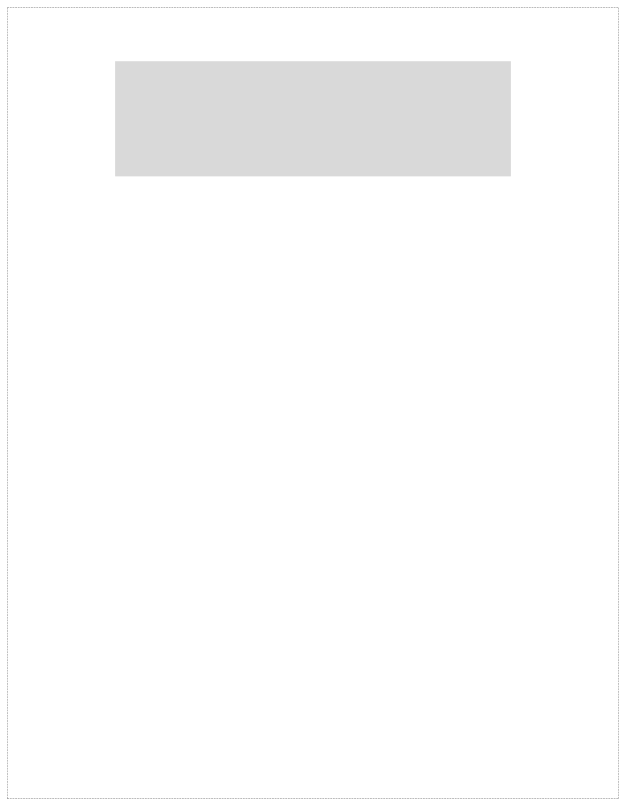

In [2]:
__PRODUCTION__ = 0
__NAME__       = 'motivation'
__WIDTH__      = 5.5  # NeurIPS 2021 text box width
__HEIGHT__     = 1.6

if __PRODUCTION__:
    from mplmagic import pgf
else:
    from mplmagic import svg

from mplmagic.util import SuperFigure, SuperAxes, size_hint
import matplotlib.pyplot as plt

print('This is how much space the figure will take up on letter paper')
size_hint(__WIDTH__, __HEIGHT__, margin_left=0.5 * (8.5 - __WIDTH__));

Square asymetric noise

In [3]:
import functools
import numpy as np
from scipy.ndimage import gaussian_filter1d
from scipy.spatial.distance import cdist
import torch
import torch.nn.functional as F
from torch import optim
import networkx as nx
import pickle

from symfac.experimental import RBFExpansionV2

In [4]:
n = 64
r = 16
A = torch.normal(0.0, 1.0, (n, r))
target = np.matmul(A, A.T)

In [15]:
target - target.T

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [5]:
target.shape

torch.Size([64, 64])

100%|██████████| 10000/10000 [00:20<00:00, 489.80it/s]


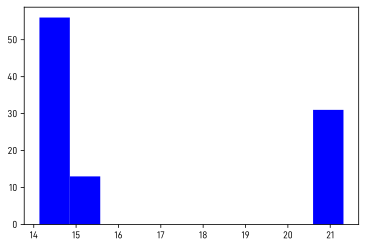

14.1342134


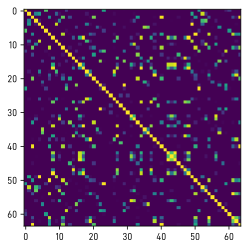

100%|██████████| 10000/10000 [00:16<00:00, 599.62it/s]


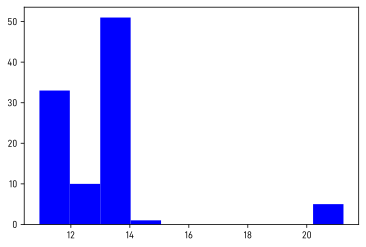

10.9341269


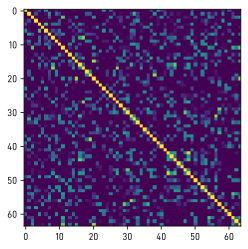

100%|██████████| 10000/10000 [00:14<00:00, 688.75it/s]


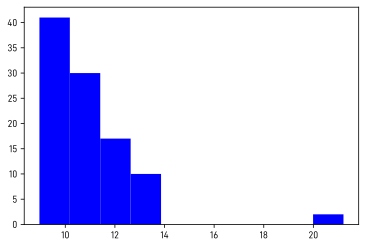

8.9577522


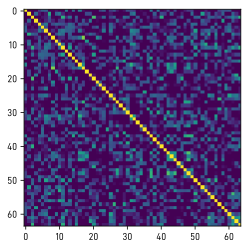

100%|██████████| 10000/10000 [00:14<00:00, 673.92it/s]


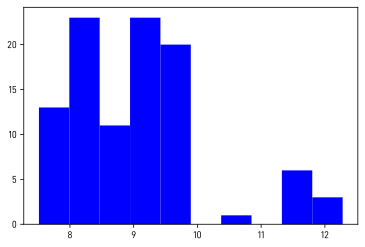

7.5137539


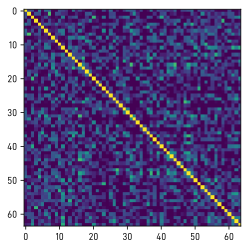

100%|██████████| 10000/10000 [00:15<00:00, 633.33it/s]


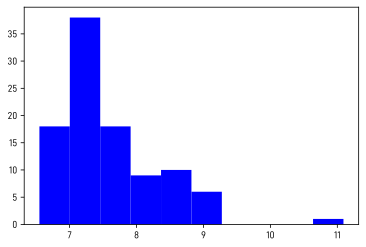

6.5489688


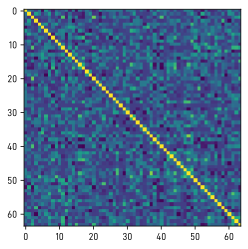

100%|██████████| 10000/10000 [00:17<00:00, 570.35it/s]


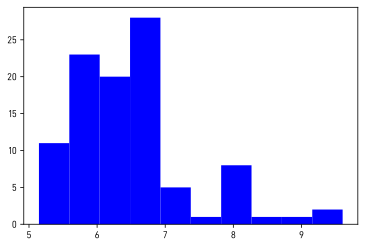

5.1460762


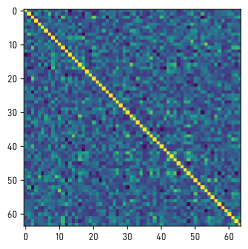

100%|██████████| 10000/10000 [00:19<00:00, 521.02it/s]


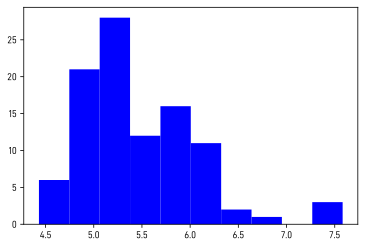

4.4314804


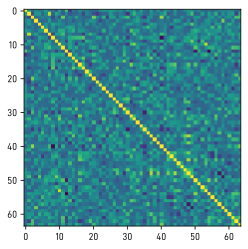

100%|██████████| 10000/10000 [00:20<00:00, 496.50it/s]


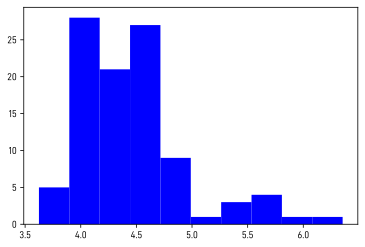

3.6242414


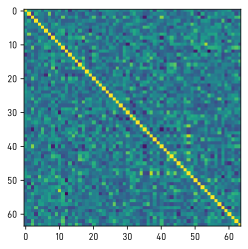

100%|██████████| 10000/10000 [00:23<00:00, 427.16it/s]


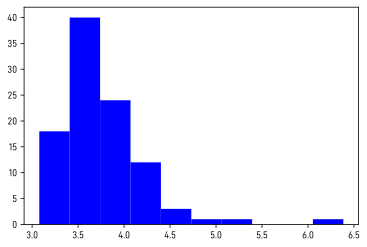

3.0781441


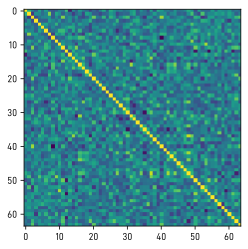

100%|██████████| 10000/10000 [00:24<00:00, 402.85it/s]


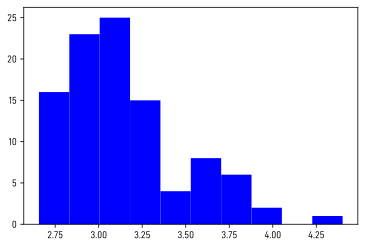

2.6567273


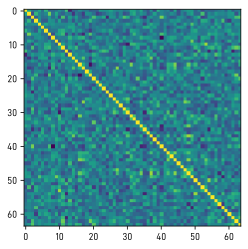

100%|██████████| 10000/10000 [00:27<00:00, 369.84it/s]


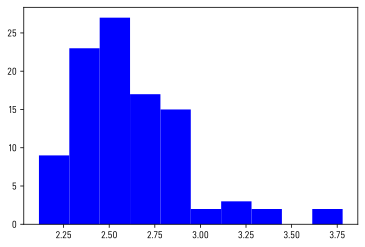

2.1147442


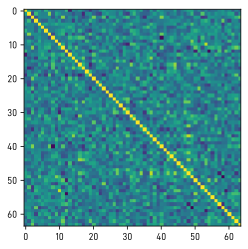

100%|██████████| 10000/10000 [00:28<00:00, 354.59it/s]


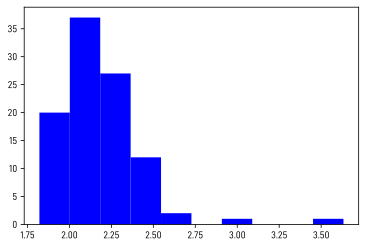

1.821099


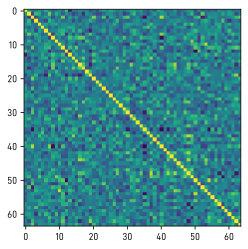

100%|██████████| 10000/10000 [00:30<00:00, 325.54it/s]


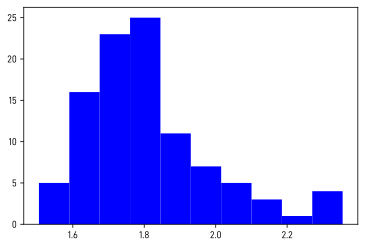

1.5051877


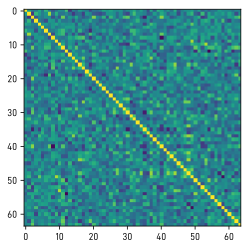

100%|██████████| 10000/10000 [00:33<00:00, 302.68it/s]


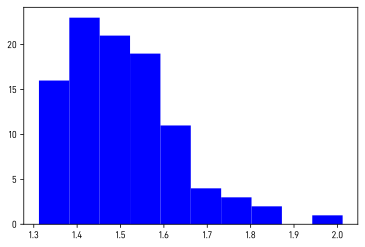

1.3119404


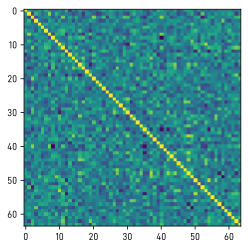

100%|██████████| 10000/10000 [00:34<00:00, 288.28it/s]


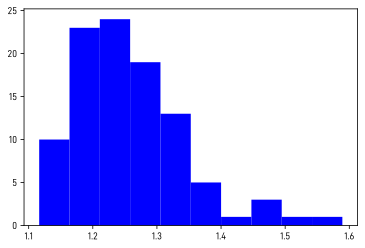

1.1164119


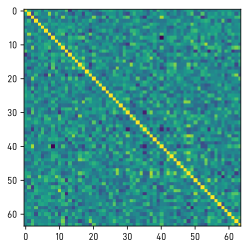

100%|██████████| 10000/10000 [00:35<00:00, 282.92it/s]


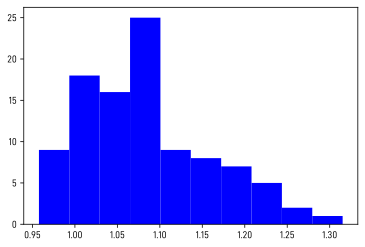

0.95765


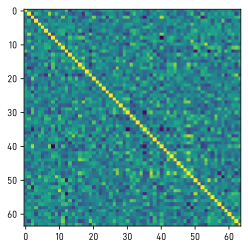

100%|██████████| 10000/10000 [00:40<00:00, 247.16it/s]


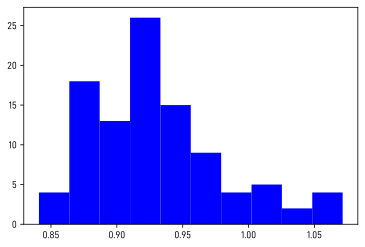

0.8408948


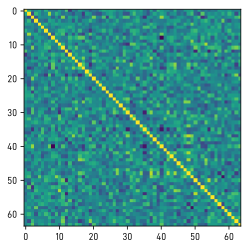

100%|██████████| 10000/10000 [00:42<00:00, 234.74it/s]


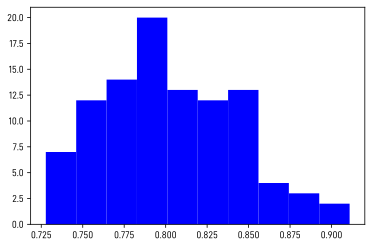

0.7277393


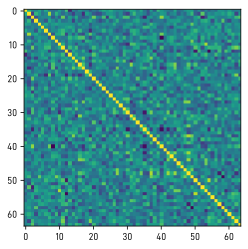

100%|██████████| 10000/10000 [00:44<00:00, 223.33it/s]


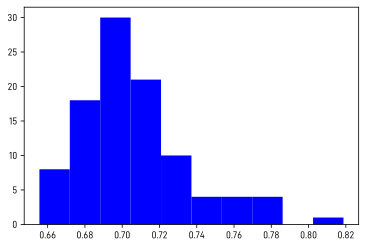

0.6555786


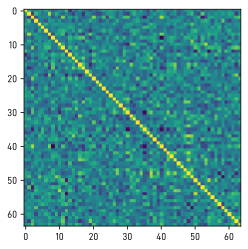

[14.1342134, 10.9341269, 8.9577522, 7.5137539, 6.5489688, 5.1460762, 4.4314804, 3.6242414, 3.0781441, 2.6567273, 2.1147442, 1.821099, 1.5051877, 1.3119404, 1.1164119, 0.95765, 0.8408948, 0.7277393, 0.6555786]


In [16]:
n = 64
batch_size = 100
errors = []


for k in range(1,20):
    u0=1/1000*torch.randn([batch_size, len(target), k], device="cuda") 
    #v0=1/1000*torch.randn([batch_size, len(target), k], device="cuda") 

    a=torch.randn([batch_size, k], device="cuda")
    b=torch.randn([batch_size], device="cuda")
    fac = RBFExpansionV2(k=k, batch_size=batch_size, max_steps=10000)
    fac.fith(
        target,
        u0=u0,
        a0=a,
        b0=b
    )
    plt.hist(fac.report.loss_best, color='b', label='1')
    plt.show()

    plt.show()
    error = fac.report.loss_best
    er = round(float(torch.min(error).cpu().detach().numpy()), 7)
    print(er)
    errors.append(er)
    plt.imshow(fac.optimum(runs=torch.argmin(fac.report.loss_best)))
    plt.show()
    open('gaus_lr_noise_{0}.pickle'.format(k), 'wb').write(pickle.dumps(fac.optimum.x))
print(errors)

In [8]:
s_vals = []
U0, S0, V0 = np.linalg.svd(target.detach().numpy())
for s in range(1, target.shape[0]+1):
    s_vals.append(round(float(F.mse_loss(torch.tensor((U0[:, :s] * S0[None, :s]) @ V0[:s, :]), target)),7))

In [9]:
s_vals

[17.8855286,
 14.637435,
 11.8262997,
 9.4417925,
 7.4972219,
 5.850183,
 4.5988836,
 3.5956101,
 2.7015464,
 2.0421188,
 1.4999996,
 0.9853873,
 0.6296103,
 0.2993683,
 0.1299807,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

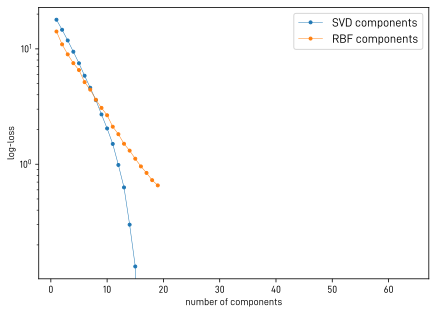

In [21]:
plt.figure(figsize=(7, 5))
plt.plot(range(1, 65), s_vals, '.-', label='SVD components')
plt.plot(range(1, 20), errs, '.-',label='RBF components')
plt.ylabel('log-loss')
plt.yscale('log')
plt.xlabel('number of components')
plt.legend(loc='upper right', fontsize=12)
#plt.title('Graph kernel 256*256')
plt.show()

In [17]:
open('n_lr_losses.pickle', 'wb').write(pickle.dumps([errors, s_vals]))

771

In [18]:
errs, s_vals = pickle.load(open("n_lr_losses.pickle", "rb"))